## KG-Integrated RAG

In [1]:
!pip install networkx transformers sentence-transformers

In [2]:
import networkx as nx
from sentence_transformers import SentenceTransformer, util
from transformers import GPT2Tokenizer

# Step 1: Create a simple Knowledge Graph using networkx
G = nx.Graph()

# Adding entities and relationships to the graph
G.add_edge("Artificial Intelligence", "Machine Learning", relation="is_a")
G.add_edge("Machine Learning", "Supervised Learning", relation="has_subtype")
G.add_edge("Machine Learning", "Unsupervised Learning", relation="has_subtype")
G.add_edge("Artificial Intelligence", "Natural Language Processing", relation="has_application")
G.add_edge("Natural Language Processing", "GPT-3", relation="has_model")
G.add_edge("GPT-3", "OpenAI", relation="developed_by")

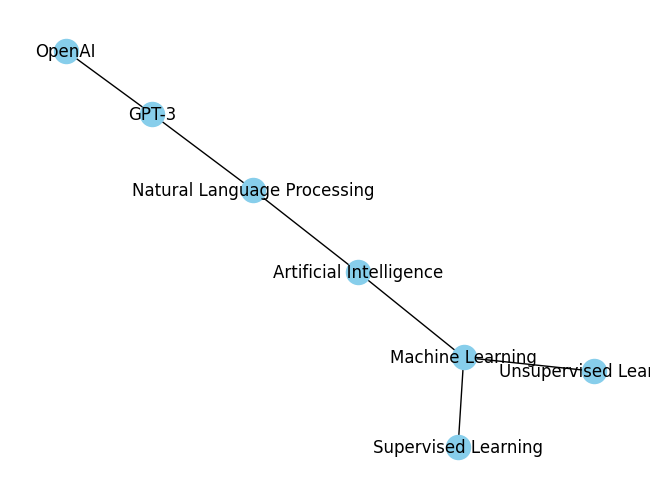

In [10]:
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
nx.draw(G,with_labels = True,node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
edge_labels = nx.get_edge_attributes(G,'edge') # key is edge, pls check for your case
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} # use this to modify the tuple keyed dict if it has > 2 elements, else ignore
nx.draw_networkx_edge_labels(G,pos,edge_labels=formatted_edge_labels,font_color='red')
plt.show()

In [3]:
# Step 2: Simple retrieval function from the Knowledge Graph
def query_knowledge_graph(entity, graph):
    # Check if the entity exists in the graph
    if entity in graph:
        neighbors = list(graph.neighbors(entity))
        relationships = [graph.edges[entity, neighbor]['relation'] for neighbor in neighbors]
        return dict(zip(neighbors, relationships))
    else:
        return {}

# Step 3: Unstructured text retrieval (simulating document retrieval)
documents = [
    "Artificial Intelligence (AI) is transforming industries with applications like healthcare and finance.",
    "Machine Learning, a subset of AI, includes techniques like supervised learning and unsupervised learning.",
    "Natural Language Processing (NLP) is an important application of AI, with models like GPT-3 leading the charge.",
    "GPT-3 is a state-of-the-art language model developed by OpenAI."
]

In [4]:
# Step 4: Simulate a hybrid retrieval mechanism
def hybrid_retrieval(query, graph, documents, top_k=2):
    # KG retrieval
    kg_results = query_knowledge_graph(query, graph)

    # Dense retrieval from documents
    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
    query_embedding = model.encode(query)
    document_embeddings = model.encode(documents)
    similarities = util.cos_sim(query_embedding, document_embeddings)
    top_doc_indices = similarities.topk(k=top_k).indices.squeeze().tolist()

    retrieved_docs = [documents[idx] for idx in top_doc_indices]
    
    return kg_results, retrieved_docs

# Step 5: LLM Integration for Response Generation
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/Users/manojkumar/Downloads/Anaconda/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [5]:
def generate_augmented_response(query, kg_results, docs):
    # Combine KG results with document content
    kg_content = "Knowledge Graph Results:\n"
    for entity, relation in kg_results.items():
        kg_content += f"{entity} ({relation})\n"
    
    doc_content = "Retrieved Documents:\n" + "\n".join(docs)
    
    # Combine both for final LLM input
    final_context = kg_content + "\n" + doc_content
    tokenized_input = tokenizer.encode(final_context, return_tensors='pt')
    
    # Here you would pass tokenized_input to your chosen LLM for generation
    # (For this example, we're just printing the context)
    return final_context

In [6]:
# Step 6: Example Query
query = "Artificial Intelligence"
kg_results, retrieved_docs = hybrid_retrieval(query, G, documents)

# Generate the final response
final_response = generate_augmented_response(query, kg_results, retrieved_docs)
print(final_response)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Knowledge Graph Results:
Machine Learning (is_a)
Natural Language Processing (has_application)

Retrieved Documents:
Machine Learning, a subset of AI, includes techniques like supervised learning and unsupervised learning.
Artificial Intelligence (AI) is transforming industries with applications like healthcare and finance.
